Dataset collection
Data cleaning



In [10]:
import pandas as pd
df = pd.read_csv("/content/Salary Data.csv")
df = df.dropna()
print("missing value per col:\n", df.isnull().sum())
print("data before encoding")
print(df.head().to_string(index = False))
categorical_cols =  df.select_dtypes(include = ['object']).columns
print(categorical_cols)
df_onehot_encoding = pd.get_dummies(df, columns = categorical_cols)
df_onehot_encoding = df_onehot_encoding.astype(int)
df_onehot_encoding

missing value per col:
 Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64
data before encoding
 Age Gender Education Level         Job Title  Years of Experience   Salary
32.0   Male      Bachelor's Software Engineer                  5.0  90000.0
28.0 Female        Master's      Data Analyst                  3.0  65000.0
45.0   Male             PhD    Senior Manager                 15.0 150000.0
36.0 Female      Bachelor's   Sales Associate                  7.0  60000.0
52.0   Male        Master's          Director                 20.0 200000.0
Index(['Gender', 'Education Level', 'Job Title'], dtype='object')


,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Job Title_Account Manager,Job Title_Accountant,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32,5,90000,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28,3,65000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45,15,150000,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36,7,60000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52,20,200000,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,35,8,85000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371,43,19,170000,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372,29,2,40000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,34,7,90000,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X = df_onehot_encoding.drop("Salary", axis=1)
y = df_onehot_encoding["Salary"]

Train _Test Split


In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear regression model

In [13]:

# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predictions

In [14]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Evaluation Metrics


In [15]:
def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{dataset_name} Metrics:")
    print(f"MAE  (Average Error)          : {mae:.2f}")
    print(f"MSE  (Penalizes large errors) : {mse:.2f}")
    print(f"RMSE (Interpretable large error): {rmse:.2f}")
    print(f"R² Score (Relative performance): {r2:.2f}")

# Evaluate on training data
evaluate_model(y_train, y_train_pred, "Training Set")

# Evaluate on test data
evaluate_model(y_test, y_test_pred, "Test Set")


Training Set Metrics:
MAE  (Average Error)          : 3898.18
MSE  (Penalizes large errors) : 38554414.69
RMSE (Interpretable large error): 6209.22
R² Score (Relative performance): 0.98

Test Set Metrics:
MAE  (Average Error)          : 11581.23
MSE  (Penalizes large errors) : 353170847.48
RMSE (Interpretable large error): 18792.84
R² Score (Relative performance): 0.85


visualization

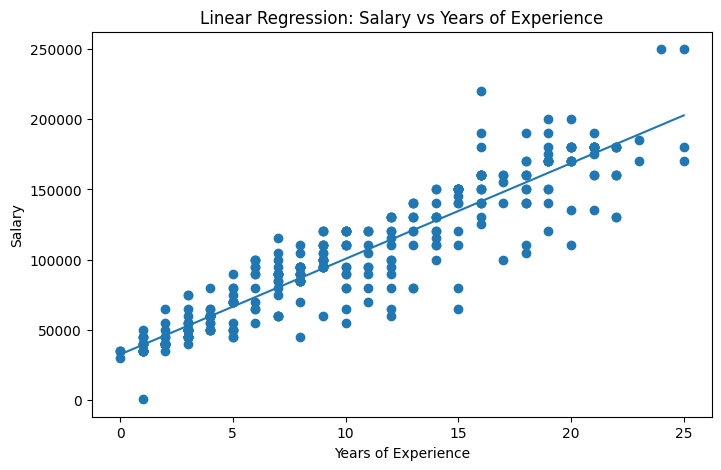

In [16]:
 #Straight line visualization: Salary vs Years of Experience

X_vis = df_onehot_encoding[['Years of Experience']]  # must be 2D
y_vis = df_onehot_encoding['Salary']

vis_model = LinearRegression()
vis_model.fit(X_vis, y_vis)

y_vis_pred = vis_model.predict(X_vis)

# Sort for straight line
sorted_idx = X_vis['Years of Experience'].argsort()
X_sorted = X_vis.iloc[sorted_idx]
y_sorted = y_vis_pred[sorted_idx]

plt.figure(figsize=(8, 5))
plt.scatter(X_vis, y_vis)
plt.plot(X_sorted, y_sorted)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Years of Experience")
plt.show()
